📌First lines


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


----------------------------------------------------------
📌 Dataset Size:


'Number of Rows: 333, Number of Columns:7\n'

----------------------------------------------------------
📌 Data Types:


,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


----------------------------------------------------------
📌 Missing Value Analysis:


'No missing data found.\n'

----------------------------------------------------------
📌 Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


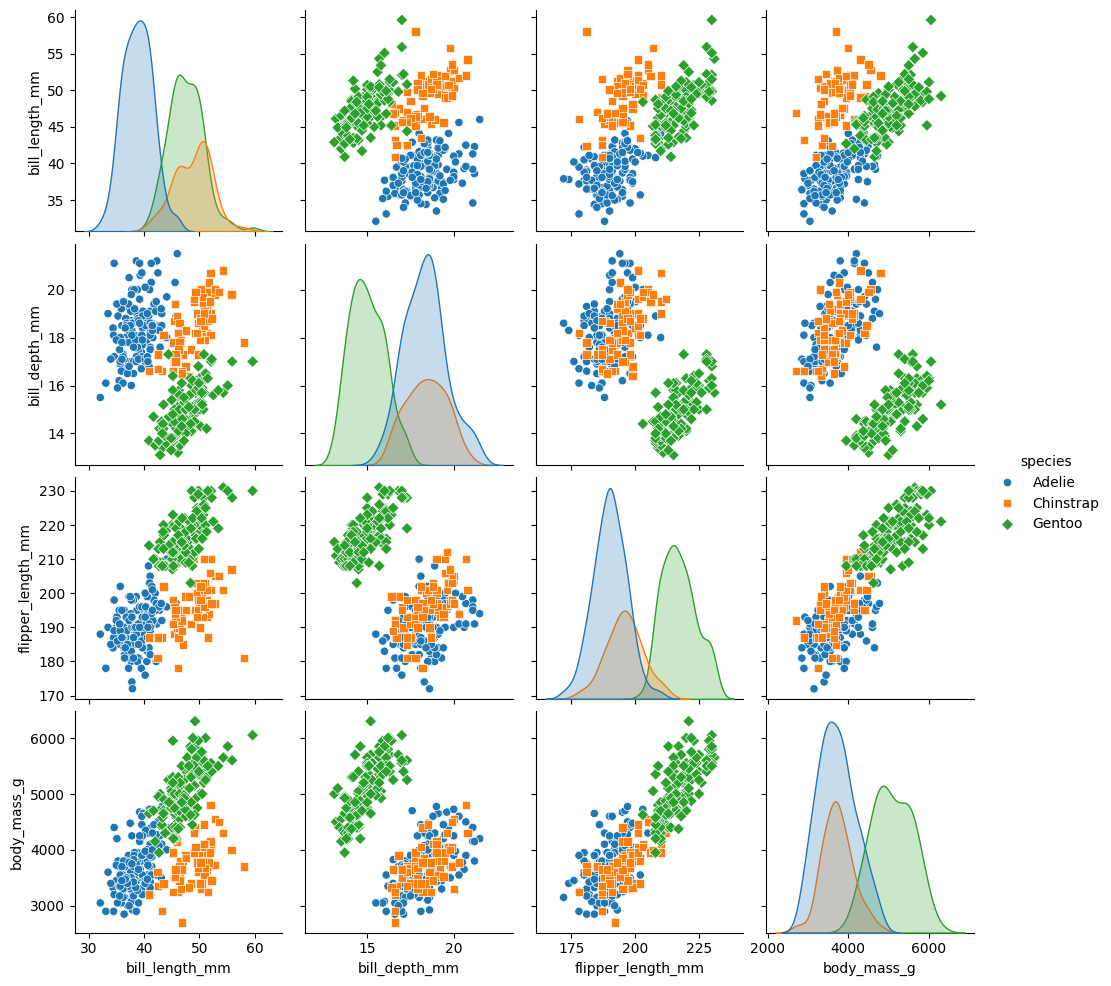

Model Accuracy Rate: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#First, let's load the dataset also remove null values ​​from penguins dataset using the dropna function.
df = sns.load_dataset("penguins").dropna()


#The size of the dataset (number of rows and columns) is shown.
#The types of data in the columns are listed.
#Missing value analysis is performed (showing which columns have missing data and the percentage).
#It is basically summarized (mean, min, max, standard deviations, etc.).
def check_df(df, head=5):

    print("📌First lines")
    display(df.head(head))
    print("----------------------------------------------------------")

    print("📌 Dataset Size:")
    display(f"Number of Rows: {df.shape[0]}, Number of Columns:{df.shape[1]}\n")
    print("----------------------------------------------------------")
    print("📌 Data Types:")
    display(df.dtypes)
    print("----------------------------------------------------------")
    print("📌 Missing Value Analysis:")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_table = pd.DataFrame({
        'Missing Value Number': missing_values,
        'Percentage of Missing Values(%)': missing_percentage.round(2)
    })
    missing_table = missing_table[missing_table["Missing Value Number"] > 0]

    if missing_table.empty:
        display("No missing data found.\n")
    else:
        display(missing_table)
    print("----------------------------------------------------------")
    print("📌 Basic Statistics:")
    display(df.describe().T)


check_df(df)
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()



# Independent variables (X) and dependent variable (y)
X = df.drop(columns=["species"])
y = df["species"]

# Digitize categorical variables
X = pd.get_dummies(X, columns=["island", "sex"], drop_first=True)  # One-Hot Encoding

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make a prediction and calculate success rate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy Rate: {accuracy:.2f}")